## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder


## Reading the Dataset

In [2]:
df = pd.read_csv("WSNBFSFdataset.csv")

In [3]:
df

,Event,Time,S_Node,Node_id,Rest_Energy,Trace_Level,Mac_Type_Pckt,Source_IP_Port,Des_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num,behaviour,Type
0,1,0.100000,79,79,600.000000,5,0,79.255,1.255,48,30,1,1,100,0,79,4,No attack,normal
1,2,0.100963,78,78,599.979723,5,800,79.255,1.255,48,30,1,1,100,0,79,4,No attack,normal
2,2,0.100963,76,76,599.979722,5,800,79.255,1.255,48,30,1,1,100,0,79,4,No attack,normal
3,2,0.100964,75,75,599.979722,5,800,79.255,1.255,48,30,1,1,100,0,79,4,No attack,normal
4,2,0.100964,118,118,599.979722,5,800,79.255,1.255,48,30,1,1,100,0,79,4,No attack,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312101,4,656.526536,140,140,465.332078,5,800,140.255,1.255,48,30,1,31,100,16,140,68,Under attack,Blackhole
312102,4,657.209643,140,140,465.191806,5,800,140.255,1.255,48,30,1,33,100,16,140,72,Under attack,Blackhole
312103,4,657.891729,140,140,465.051737,5,800,140.255,1.255,48,30,1,35,100,16,140,76,Under attack,Blackhole
312104,4,658.574656,140,140,464.911501,5,800,140.255,1.255,48,30,1,37,100,16,140,80,Under attack,Blackhole


In [4]:
df.shape

(312106, 19)

## Checking for nulls and duplicates

In [5]:
df.isnull().sum()

Event             0
Time              0
S_Node            0
Node_id           0
Rest_Energy       0
Trace_Level       0
Mac_Type_Pckt     0
Source_IP_Port    0
Des_IP_Port       0
Packet_Size       0
TTL               0
Hop_Count         0
Broadcast_ID      0
Dest_Node_Num     0
Dest_Seq_Num      0
Src_Node_ID       0
Src_Seq_Num       0
behaviour         0
Type              0
dtype: int64

In [6]:
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [Event, Time, S_Node, Node_id, Rest_Energy, Trace_Level, Mac_Type_Pckt, Source_IP_Port, Des_IP_Port, Packet_Size, TTL, Hop_Count, Broadcast_ID, Dest_Node_Num, Dest_Seq_Num, Src_Node_ID, Src_Seq_Num, behaviour, Type]
Index: []


## Exploratory Data Analysis

In [7]:
df.columns

Index(['Event', 'Time', 'S_Node', 'Node_id', 'Rest_Energy', 'Trace_Level',
       'Mac_Type_Pckt', 'Source_IP_Port', 'Des_IP_Port', 'Packet_Size', 'TTL',
       'Hop_Count', 'Broadcast_ID', 'Dest_Node_Num', 'Dest_Seq_Num',
       'Src_Node_ID', 'Src_Seq_Num', 'behaviour', 'Type'],
      dtype='object')

In [8]:
# Statistics
df.describe()

,Event,Time,S_Node,Node_id,Rest_Energy,Trace_Level,Mac_Type_Pckt,Source_IP_Port,Des_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num
count,312106.000000,312106.000000,312106.000000,312106.000000,312106.000000,312106.0,312106.000000,312106.000000,3.121060e+05,312106.00000,312106.000000,312106.000000,312106.000000,312106.000000,312106.000000,312106.000000,312106.000000
mean,2.240694,171.643268,99.033985,99.033985,564.304358,5.0,799.841080,99.249765,1.255000e+00,58.16588,22.930709,6.717481,29.031685,142.348853,1.061117,134.138869,61.476665
std,0.768737,95.862820,55.050837,55.050837,19.965393,0.0,11.274371,54.113212,3.686168e-12,22.05170,5.707731,2.878066,22.155234,43.186780,3.264662,54.115467,44.952879
min,1.000000,0.100000,0.000000,0.000000,460.705905,5.0,0.000000,0.255000,1.255000e+00,48.00000,0.000000,1.000000,1.000000,36.000000,0.000000,0.000000,4.000000
25%,2.000000,80.032883,53.000000,53.000000,544.581758,5.0,800.000000,54.255000,1.255000e+00,48.00000,21.000000,4.000000,7.000000,131.000000,0.000000,160.000000,16.000000
50%,2.000000,160.640504,99.000000,99.000000,566.662834,5.0,800.000000,99.255000,1.255000e+00,48.00000,24.000000,6.000000,27.000000,149.000000,0.000000,160.000000,58.000000
75%,2.000000,265.137521,145.000000,145.000000,583.452839,5.0,800.000000,143.255000,1.255000e+00,48.00000,26.000000,9.000000,49.000000,172.000000,0.000000,160.000000,102.000000
max,4.000000,679.054956,199.000000,199.000000,600.000000,5.0,800.000000,199.255000,1.255000e+00,106.00000,30.000000,17.000000,70.000000,199.000000,17.000000,188.000000,144.000000


In [9]:
# Mode of all columns
for col in df:
    mode_value = df[col].mode().iloc[0]
    mode_count = df[col].value_counts()[mode_value]
    print(f"Mode of {col}: {mode_value}, Mode Count: {mode_count}")

Mode of Event: 2, Mode Count: 248406
Mode of Time: 135.636173, Mode Count: 14
Mode of S_Node: 45, Mode Count: 1988
Mode of Node_id: 45, Mode Count: 1988
Mode of Rest_Energy: 599.978982, Mode Count: 26
Mode of Trace_Level: 5, Mode Count: 312106
Mode of Mac_Type_Pckt: 800, Mode Count: 312044
Mode of Source_IP_Port: 125.255, Mode Count: 2065
Mode of Des_IP_Port: 1.255, Mode Count: 312106
Mode of Packet_Size: 48, Mode Count: 257402
Mode of TTL: 26, Mode Count: 38847
Mode of Hop_Count: 5, Mode Count: 43244
Mode of Broadcast_ID: 1, Mode Count: 20969
Mode of Dest_Node_Num: 100, Mode Count: 21880
Mode of Dest_Seq_Num: 0, Mode Count: 276977
Mode of Src_Node_ID: 160, Mode Count: 243954
Mode of Src_Seq_Num: 4, Mode Count: 20968
Mode of behaviour: No attack, Mode Count: 262851
Mode of Type: normal, Mode Count: 262851


In [10]:
# Percetange of the Type

percentage_normal = (df['Type'].value_counts()["normal"] / df.shape[0]) * 100
print(f"No attack: {percentage_normal}")

percentage_blackhole = (df['Type'].value_counts()["Blackhole"] / df.shape[0]) * 100
print(f"Blackhole: {percentage_blackhole}")

percentage_flooding = (df['Type'].value_counts()["Flooding"] / df.shape[0]) * 100
print(f"Flooding: {percentage_flooding}")

percentage_forwarding = (df['Type'].value_counts()["Forwarding"] / df.shape[0]) * 100
print(f"Forwarding: {percentage_forwarding}")

No attack: 84.21850268818926
Blackhole: 3.7698730559489406
Flooding: 9.562135940994406
Forwarding: 2.449488314867385


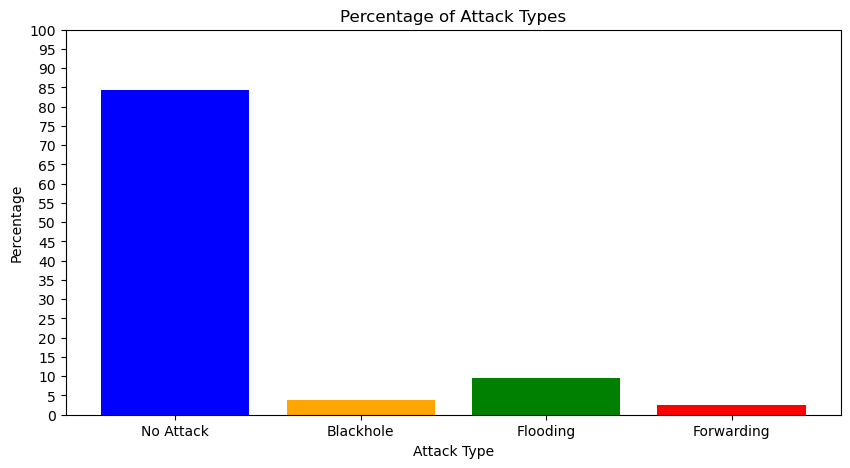

In [11]:
attack_types = ['No Attack', 'Blackhole', 'Flooding', 'Forwarding']
percentages = [percentage_normal, percentage_blackhole, percentage_flooding, percentage_forwarding]
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(10, 5))
plt.bar(attack_types, percentages, color= colors)
plt.title('Percentage of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Percentage')
plt.yticks(range(0, 105, 5))

plt.show()

In [12]:
# search for Event

In [13]:
df['Event'].value_counts()

2    248406
4     46274
1     17426
Name: Event, dtype: int64

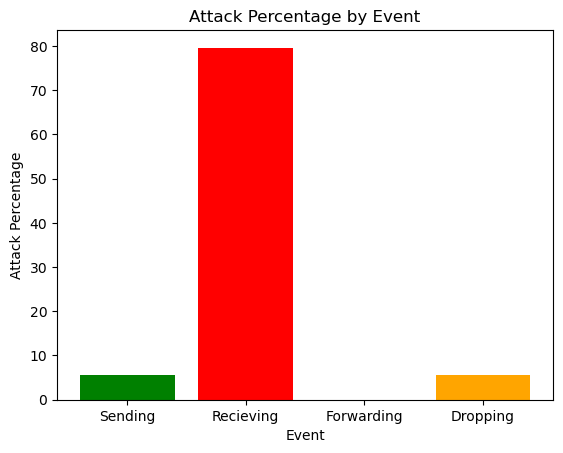

In [14]:
events = ["Sending", "Recieving", "Forwarding", "Dropping"]
blackhole_attack_counts = [17426/df.shape[0] * 100,248406/df.shape[0] * 100, 0 ,17426/df.shape[0] * 100 ]

colors = ['green', 'red',"blue" ,'orange']

plt.bar(events, blackhole_attack_counts, color=colors)

plt.xlabel('Event')
plt.ylabel('Attack Percentage')
plt.title('Attack Percentage by Event')

plt.show()

#### Observation #1: Approximately, 84.22% of the behaviours were "No attack".

#### Observation #2: Approximarely, 79.6% of the events were event 2 (Receiving).

## Investigating the Blackhole, Flooding, and Forwarding attack, in addition to the Normal State of the Network.

## Blackhole

In [15]:
# Checking the strength of association and statistical significance of Event and Type

label_encoder = LabelEncoder()
df['Type_encoded'] = label_encoder.fit_transform(df['Type'])
df['behaviour_encoded'] = label_encoder.fit_transform(df['behaviour'])

df_encoded = df.copy()
columns_to_drop = ['Type', 'behaviour'] 
df_encoded.drop(columns = ['Type', 'behaviour'] , inplace = True)

In [16]:
contingency_table = pd.crosstab(df_encoded['Type_encoded'], df_encoded['Event'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    r_corr = r - ((r - 1)**2) / (n - 1)
    k_corr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))

cramers_v_coefficient = cramers_v(contingency_table.values)

print(f"Chi-squared: {chi2}")
print(f"p-value: {p}")
print(f"Cramer's V coefficient: {cramers_v_coefficient}")

Chi-squared: 759.4604165120966
p-value: 8.820102162853289e-161
Cramer's V coefficient: 0.03474285869084319


#### The low Cramer's V coefficient suggests that the strength of association between the variables is weak, despite the statistically significant p-value.There may be a significant relationship between "Event" and "Type" due to the very low p-value, but the actual strength of the association is weak according to Cramer's V.

In [17]:
blackhole_attacks = df[df['Type'] == 'Blackhole']

# Group blackhole attacks by 'Event' and count the occurrences
event_counts = blackhole_attacks['Event'].value_counts().reset_index()
event_counts.columns = ['Event', 'Blackhole_Attack_Count']

event_counts

,Event,Blackhole_Attack_Count
0,2,9526
1,4,2081
2,1,159


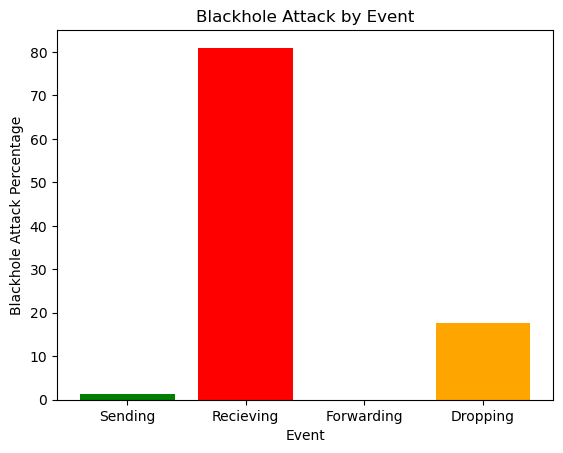

In [18]:
events = ["Sending", "Recieving", "Forwarding", "Dropping"]
blackhole_attack_counts = [159/blackhole_attacks.shape[0] * 100,9526/blackhole_attacks.shape[0] * 100, 0 ,2081/blackhole_attacks.shape[0] * 100]

colors = ['green', 'red',"blue" ,'orange']

plt.bar(events, blackhole_attack_counts, color=colors)

plt.xlabel('Event')
plt.ylabel('Blackhole Attack Percentage')
plt.title('Blackhole Attack by Event')

plt.show()

In [19]:
df["Event"].value_counts()

2    248406
4     46274
1     17426
Name: Event, dtype: int64

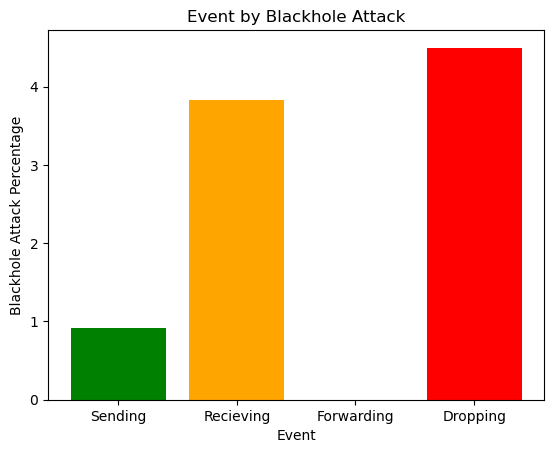

In [20]:
events = ["Sending", "Recieving", "Forwarding", "Dropping"]
blackhole_attack_counts = [159/17426 * 100 ,9526/248406 * 100 , 0 ,2081/46274 * 100 ]

colors = ['green', 'orange',"blue" ,'red']

plt.bar(events, blackhole_attack_counts, color=colors)

plt.xlabel('Event')
plt.ylabel('Blackhole Attack Percentage')
plt.title('Event by Blackhole Attack')

plt.show()

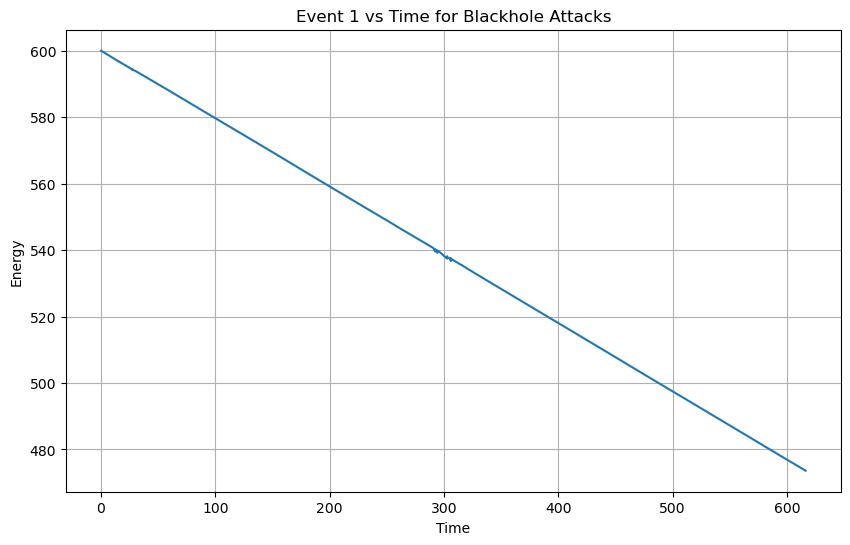

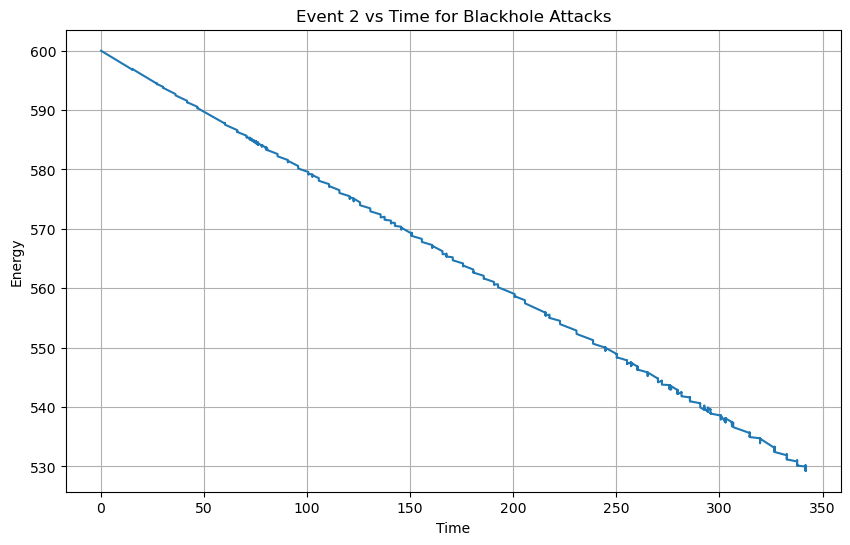

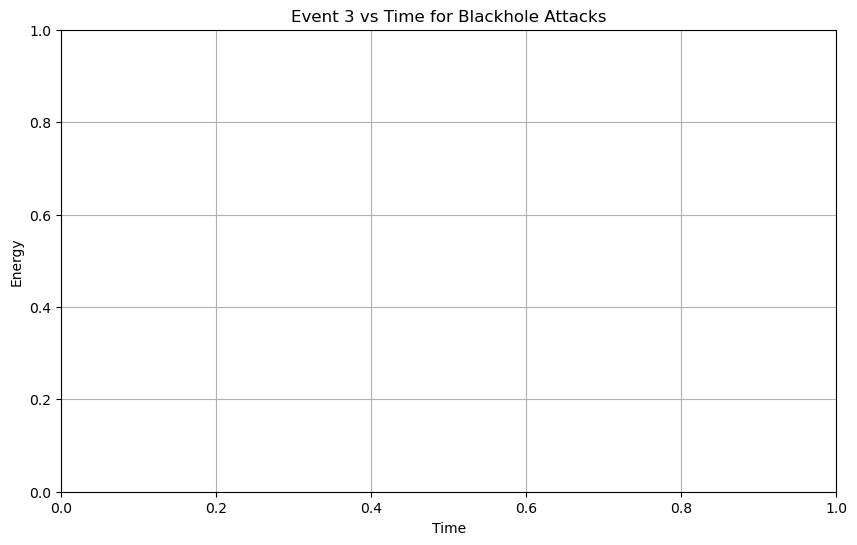

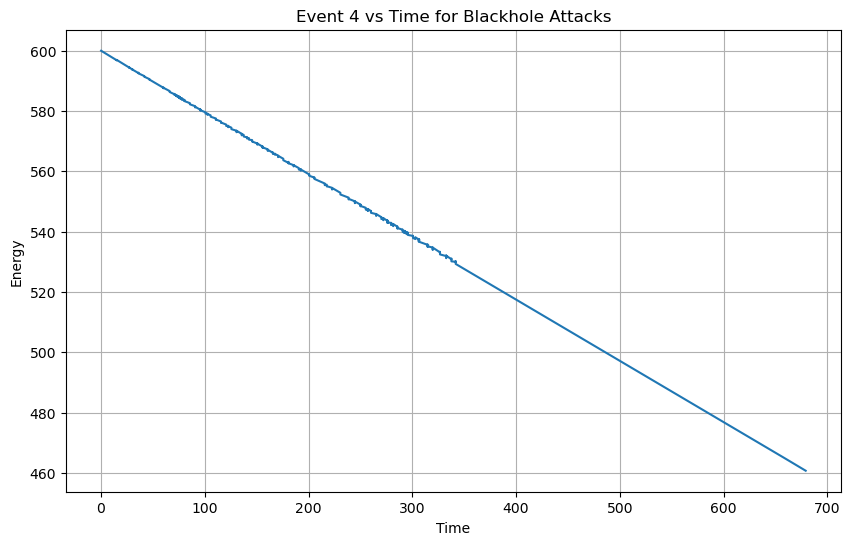

In [21]:
# Filter the DataFrame to include only rows with Type = 'Blackhole'
blackhole_attacks = df[df['Type'] == 'Blackhole']

event = [1,2,3,4]
for i in event:
    blackhole_attacks_recieving = blackhole_attacks[blackhole_attacks["Event"] == i]

    # Create a scatter plot for each event compared to time
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=blackhole_attacks_recieving, x='Time', y='Rest_Energy')
    plt.title(f'Event {i} vs Time for Blackhole Attacks')
    plt.xlabel('Time')
    plt.ylabel('Energy')
    plt.grid(True)
    plt.show()

In [22]:
for i in range(0, 200):
    node = df['Node_id'] == i
    df.loc[node, 'Lost_Energy'] = (df.loc[node, 'Rest_Energy'].shift(1) - df.loc[node, 'Rest_Energy']).shift(-1)
df.dropna(subset=['Lost_Energy'], inplace=True)

In [23]:
contingency_table = pd.crosstab(df_encoded['Type_encoded'], df_encoded['Node_id'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    r_corr = r - ((r - 1)**2) / (n - 1)
    k_corr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))

cramers_v_coefficient = cramers_v(contingency_table.values)

print(f"Chi-squared: {chi2}")
print(f"p-value: {p}")
print(f"Cramer's V coefficient: {cramers_v_coefficient}")

Chi-squared: 587547.1079350538
p-value: 0.0
Cramer's V coefficient: 0.791755326481275


####  The results suggest a strong and significant association between the Type column and the Node_id column analyzed using the chi-squared test.

In [24]:
blackhole = df[df['Type'] == 'Blackhole']

blackhole_stats = blackhole.groupby('Node_id').size().reset_index(name='Attack_Count')

blackhole_stats.sort_values(by = 'Attack_Count', ascending = False, inplace = True)

In [25]:
blackhole_stats

,Node_id,Attack_Count
7,140,1837
6,74,1754
3,62,1709
2,61,1701
5,65,1636
4,63,1621
0,33,1310
1,60,191


In [26]:
blackhole_nodes = blackhole_stats['Node_id'].tolist()

In [27]:
blackhole_nodes

[140, 74, 62, 61, 65, 63, 33, 60]

In [28]:
for node in blackhole_nodes:
    print("Node: ", node)
    print(df[df["Node_id"] == node]['Type'].value_counts())

Node:  140
Blackhole    1837
Name: Type, dtype: int64
Node:  74
Blackhole    1754
normal         76
Flooding       12
Name: Type, dtype: int64
Node:  62
Blackhole    1709
normal         75
Flooding        7
Name: Type, dtype: int64
Node:  61
Blackhole    1701
normal         60
Flooding        9
Name: Type, dtype: int64
Node:  65
Blackhole    1636
normal         73
Flooding       13
Name: Type, dtype: int64
Node:  63
Blackhole    1621
normal         59
Flooding        7
Name: Type, dtype: int64
Node:  33
Blackhole    1310
normal         50
Flooding       12
Name: Type, dtype: int64
Node:  60
normal       1433
Blackhole     191
Flooding      191
Name: Type, dtype: int64


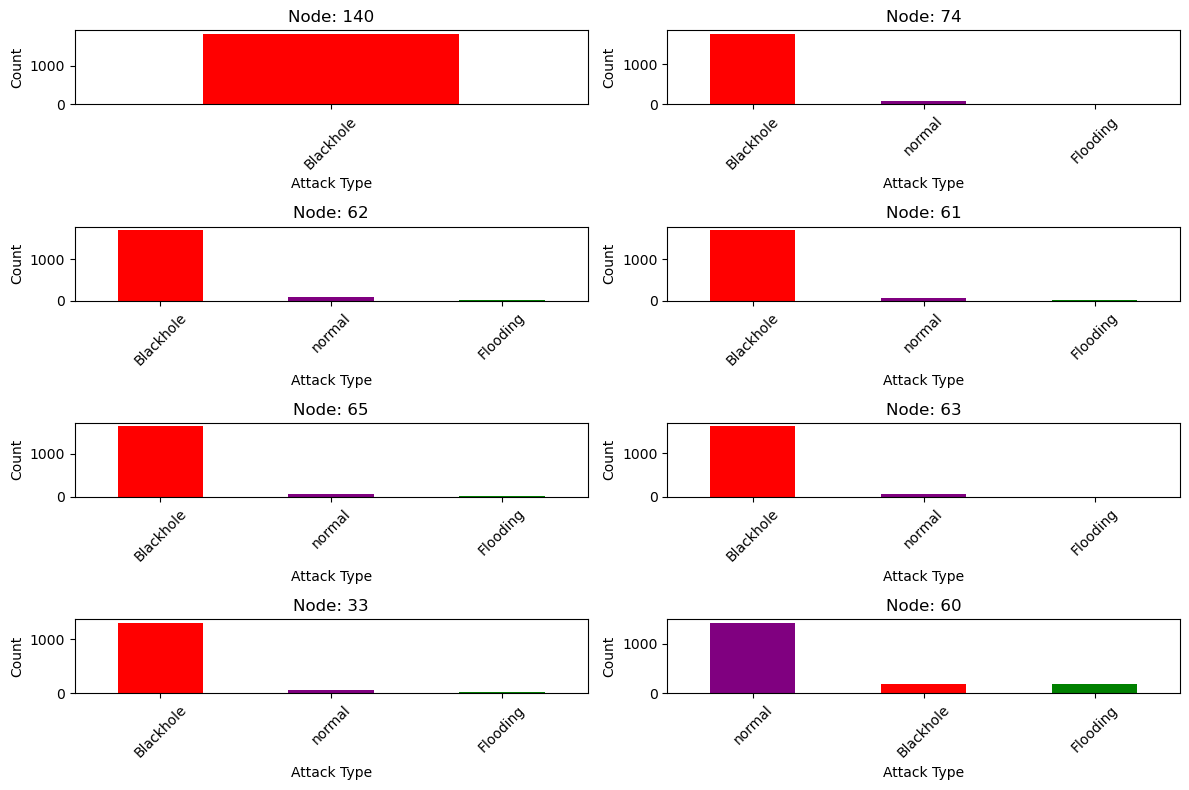

In [29]:
colors = {'Blackhole': 'red', 'Flooding': 'green', 'Forwarding': 'blue', 'normal': 'purple'}

plt.figure(figsize=(12, 8))
for i, node in enumerate(blackhole_nodes, start=1):
    plt.subplot(4, 2, i)
    type_counts = df[df["Node_id"] == node]['Type'].value_counts()
    type_counts.plot(kind='bar', color=[colors.get(c, 'grey') for c in type_counts.index])
    plt.title(f'Node: {node}')
    plt.xlabel('Attack Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

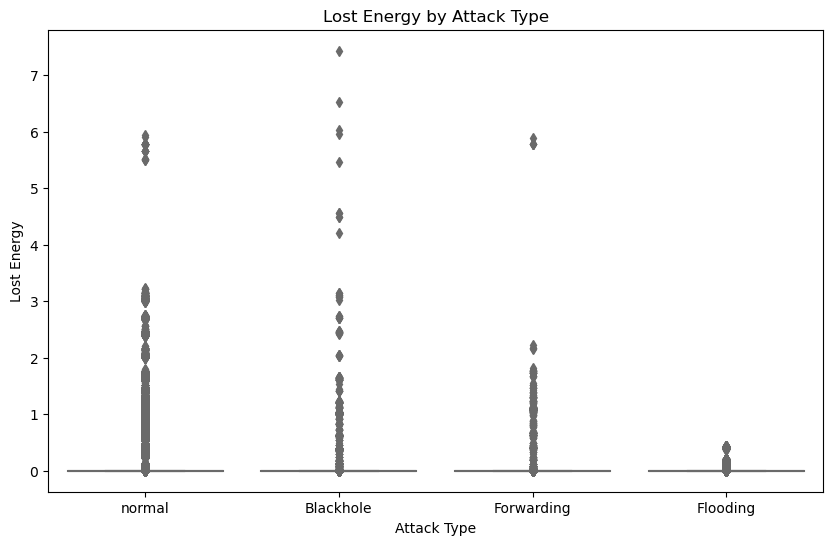

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Type', y='Lost_Energy', palette='Set3')
plt.title('Lost Energy by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Lost Energy')
plt.show()

In [31]:
contingency_table = pd.crosstab(df_encoded['Type_encoded'], df_encoded['Hop_Count'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    r_corr = r - ((r - 1)**2) / (n - 1)
    k_corr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))

cramers_v_coefficient = cramers_v(contingency_table.values)

print(f"Chi-squared: {chi2}")
print(f"p-value: {p}")
print(f"Cramer's V coefficient: {cramers_v_coefficient}")

Chi-squared: 25788.850386624017
p-value: 0.0
Cramer's V coefficient: 0.1658066118703431


In [32]:
def contingency_ (col1, col2):

    contingency_table = pd.crosstab(

    index=col1,

    columns=col2,

    margins=True)

    return contingency_table

In [33]:
contingency_(df['Type'],df["Hop_Count"]).head()

Hop_Count,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,All
Type,,,,,,,,,,,,,,,,,,
Blackhole,48,373,451,459,659,1070,1863,1945,1481,1349,1076,603,277,76,23,3,3,11759
Flooding,152,2410,4042,5532,6741,4970,3167,1854,556,398,22,0,0,0,0,0,0,29844
Forwarding,11,930,2103,2252,1239,507,215,62,70,70,58,64,50,9,0,0,0,7640
normal,883,11111,19971,28589,34569,31222,27498,27168,24708,22300,17112,10602,4798,1728,343,41,20,262663
All,1094,14824,26567,36832,43208,37769,32743,31029,26815,24117,18268,11269,5125,1813,366,44,23,311906


In [34]:
normal = df[df['Type'] == 'normal']
blackhole = df[df['Type'] == 'Blackhole']

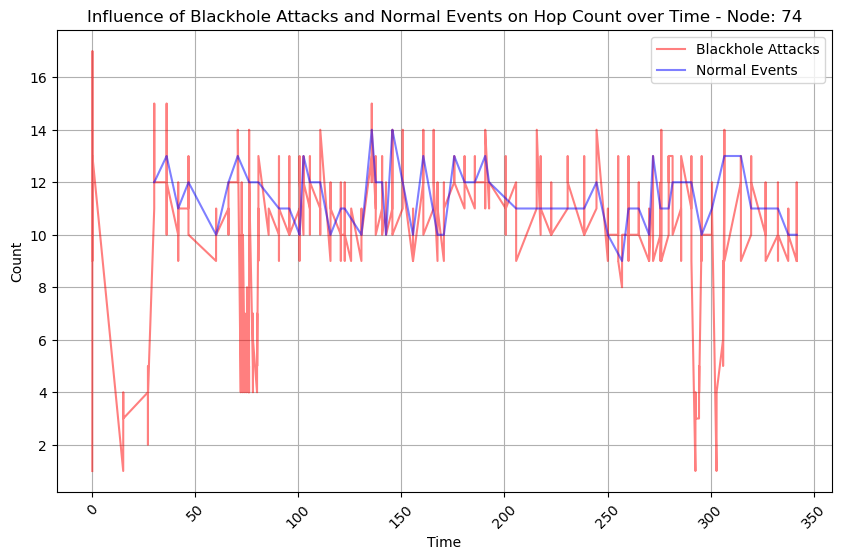

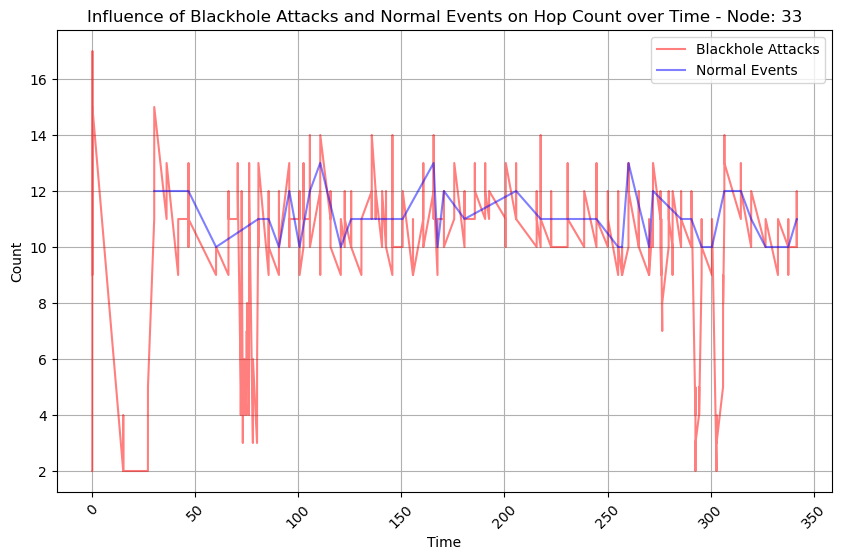

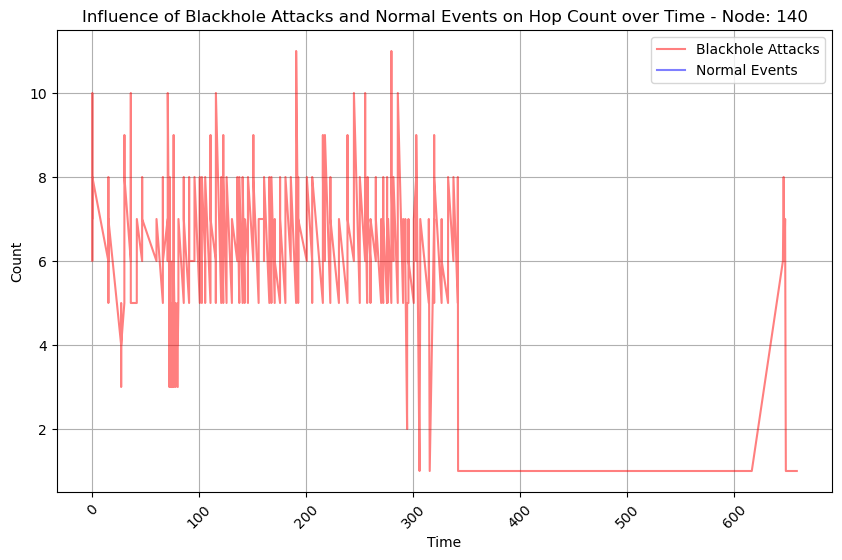

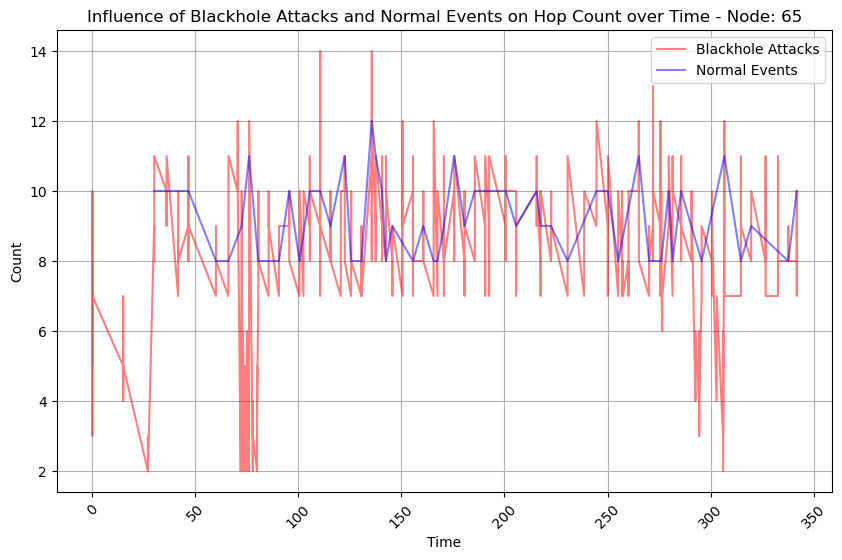

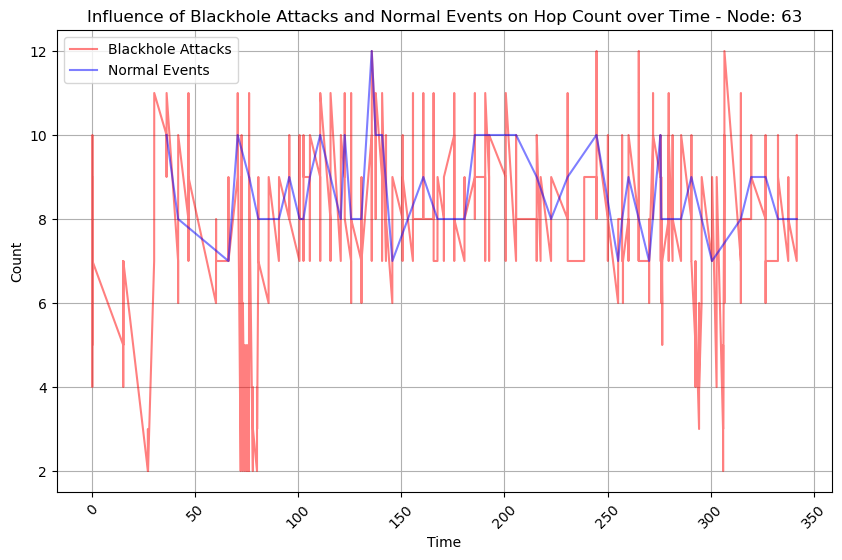

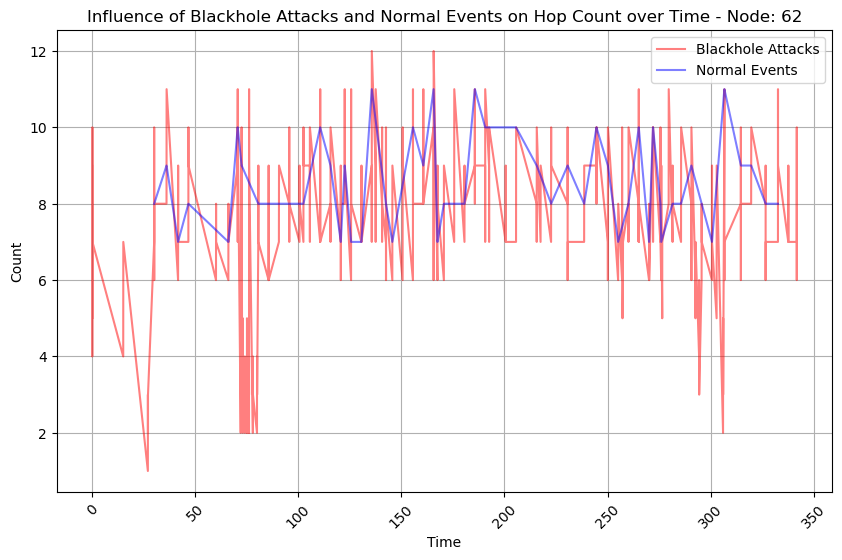

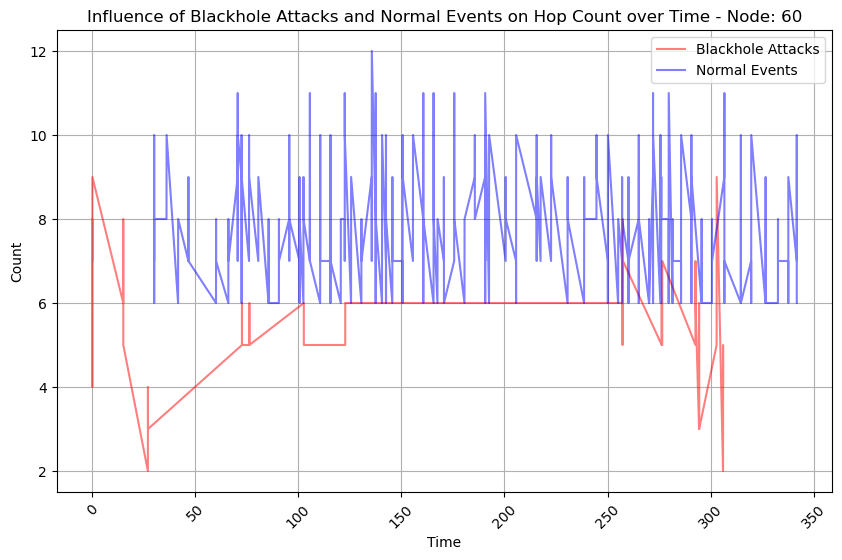

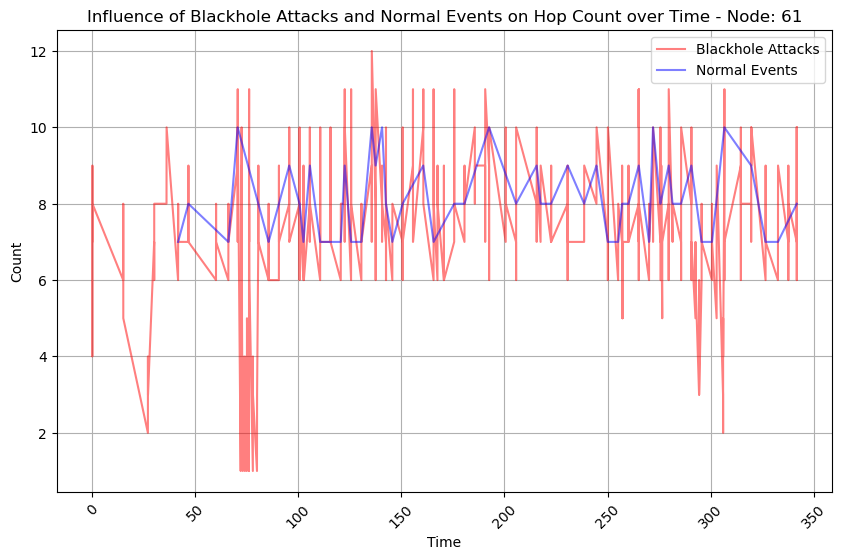

In [35]:
for i in blackhole["Node_id"].unique():
    blackhole_node = blackhole[blackhole["Node_id"] == i]
    normal_node = normal[normal["Node_id"] == i]

    plt.figure(figsize=(10, 6))

    plt.plot(blackhole_node['Time'], blackhole_node['Hop_Count'], color='red', alpha=0.5, label='Blackhole Attacks')
    plt.plot(normal_node['Time'], normal_node['Hop_Count'], color='blue', alpha=0.5, label='Normal Events')

    plt.title(f'Influence of Blackhole Attacks and Normal Events on Hop Count over Time - Node: {i}')
    plt.xlabel('Time')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()


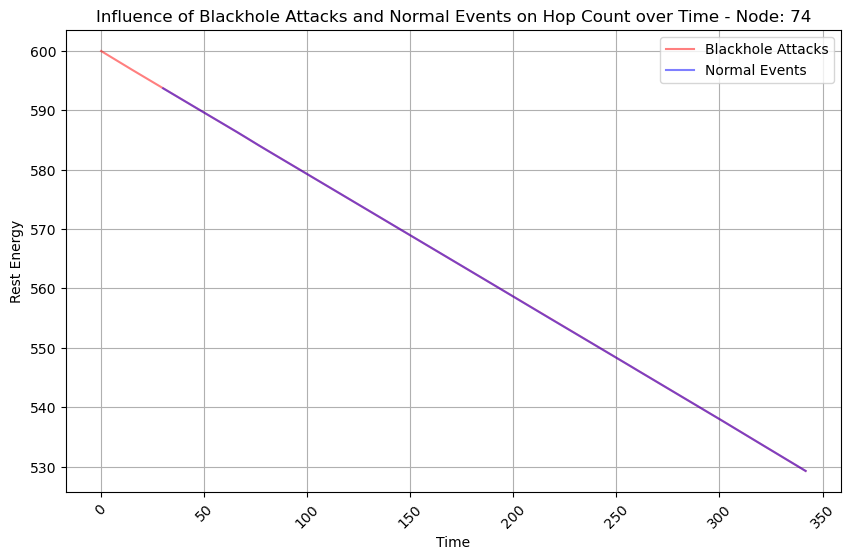

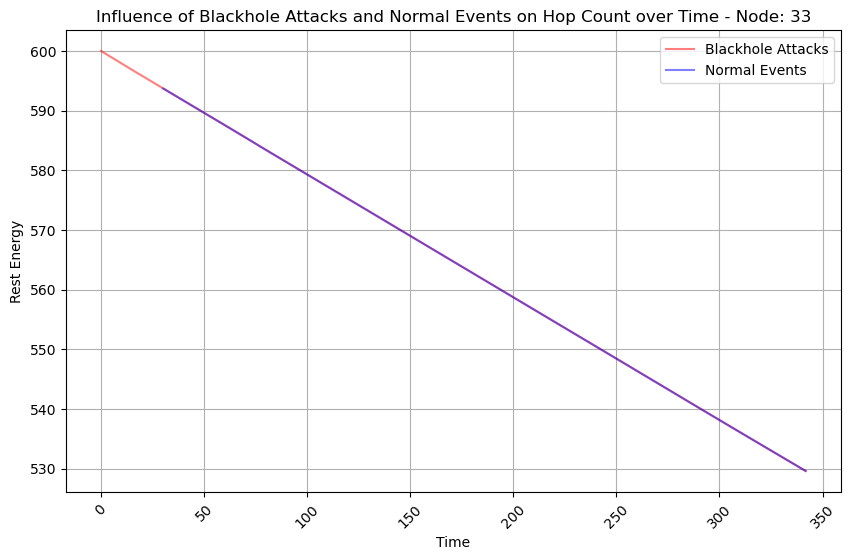

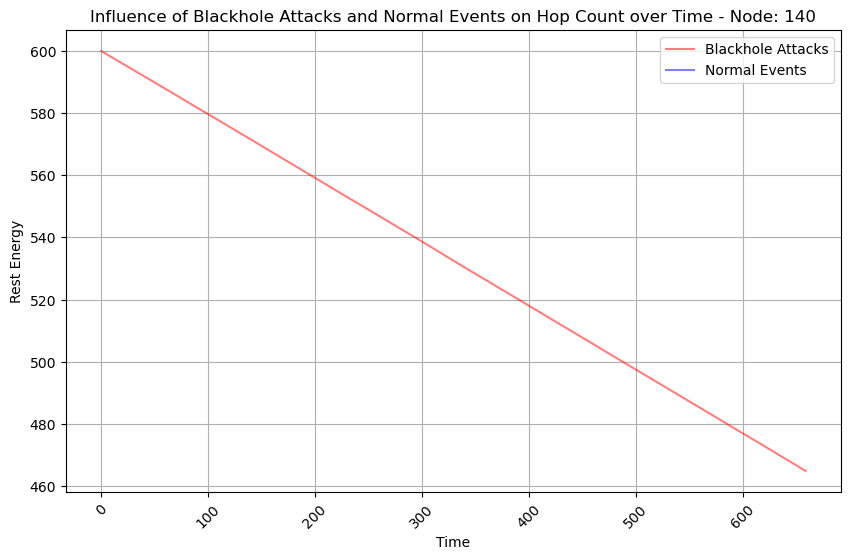

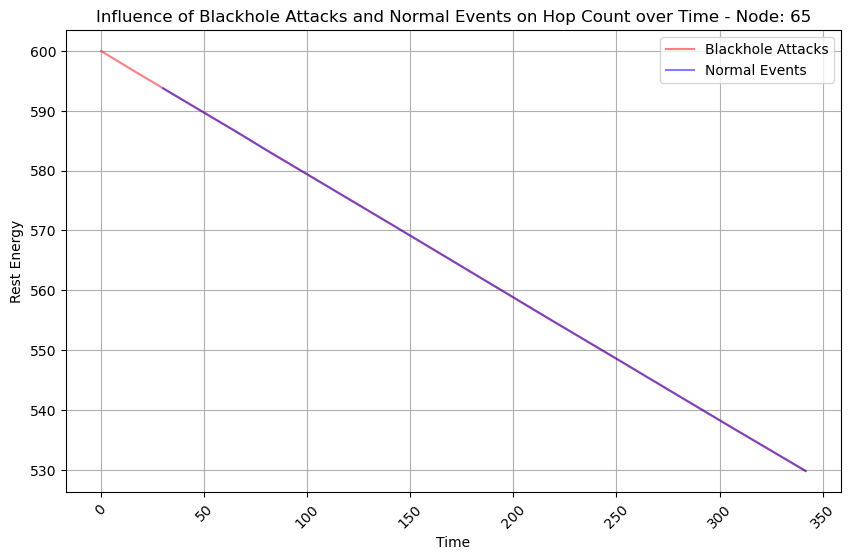

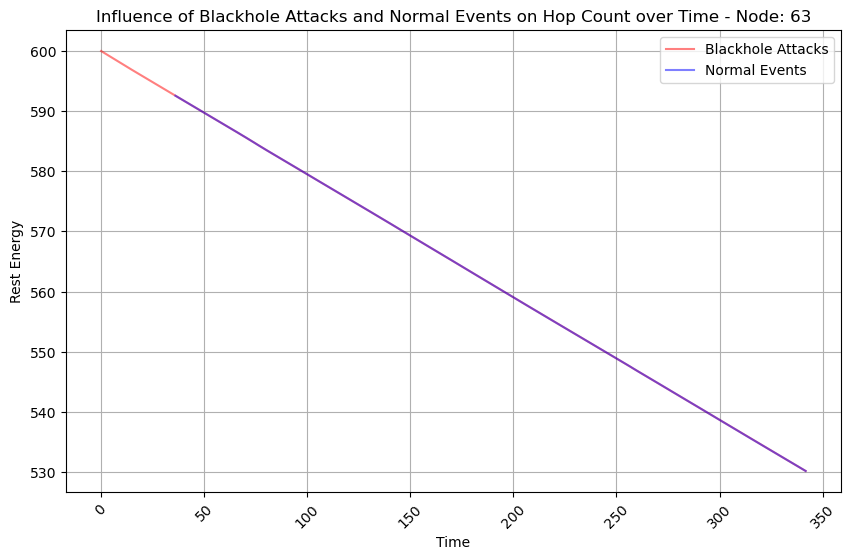

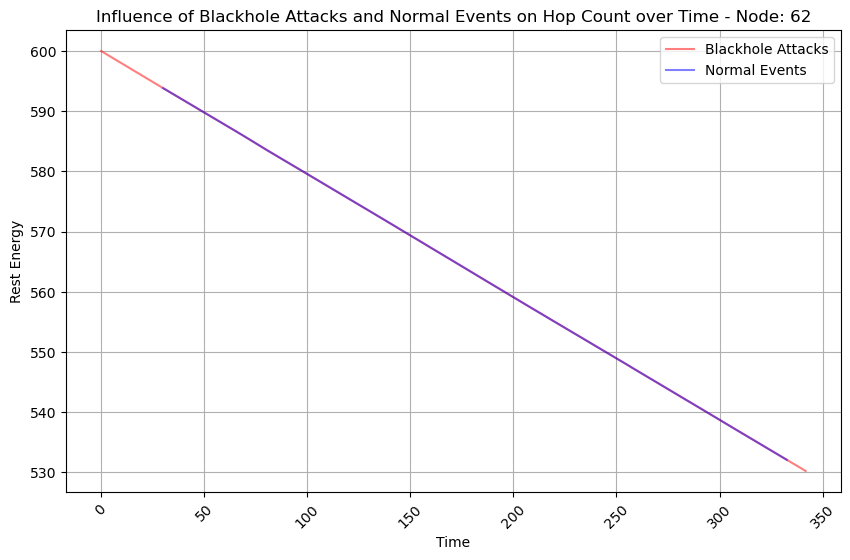

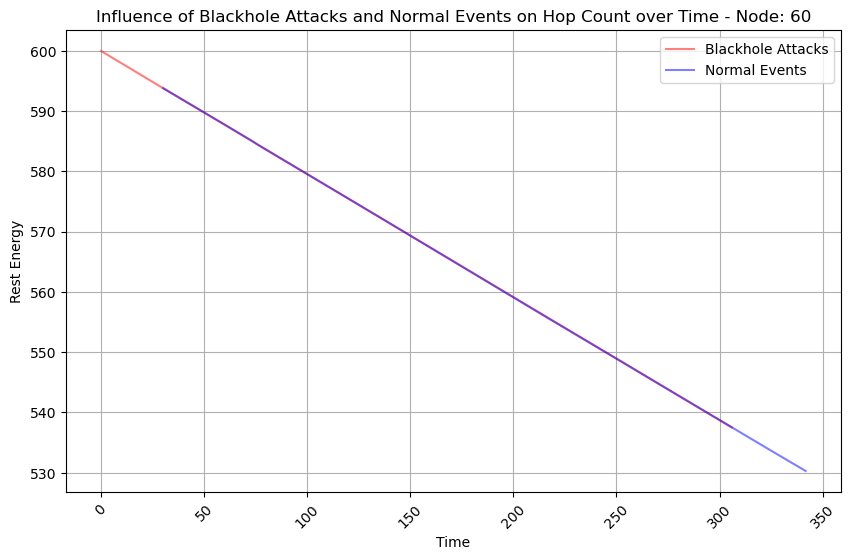

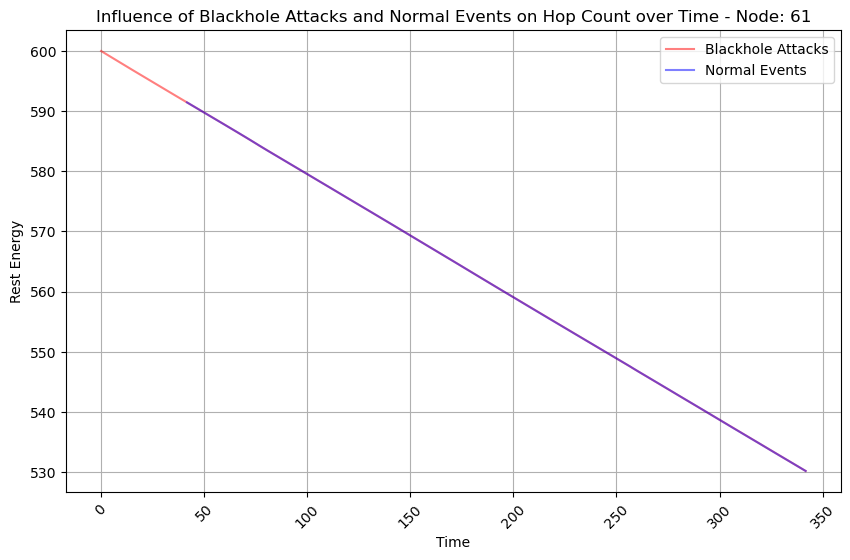

In [36]:
for i in blackhole["Node_id"].unique():
    blackhole_node = blackhole[blackhole["Node_id"] == i]
    normal_node = normal[normal["Node_id"] == i]

    plt.figure(figsize=(10, 6))

    plt.plot(blackhole_node['Time'], blackhole_node['Rest_Energy'], color='red', alpha=0.5, label='Blackhole Attacks')
    plt.plot(normal_node['Time'], normal_node['Rest_Energy'], color='blue', alpha=0.5, label='Normal Events')

    plt.title(f'Influence of Blackhole Attacks and Normal Events on Hop Count over Time - Node: {i}')
    plt.xlabel('Time')
    plt.ylabel('Rest Energy')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()


In [37]:
contingency_table = pd.crosstab(df_encoded['Type_encoded'], df_encoded['TTL'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    r_corr = r - ((r - 1)**2) / (n - 1)
    k_corr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))

cramers_v_coefficient = cramers_v(contingency_table.values)

print(f"Chi-squared: {chi2}")
print(f"p-value: {p}")
print(f"Cramer's V coefficient: {cramers_v_coefficient}")

Chi-squared: 30051.878456874027
p-value: 0.0
Cramer's V coefficient: 0.17893018164722477


In [38]:
contingency_(df['Type'],df["TTL"]).head()

TTL,0,1,2,3,4,5,6,7,8,14,...,22,23,24,25,26,27,28,29,30,All
Type,,,,,,,,,,,,,,,,,,,,,
Blackhole,13,174,155,70,38,32,27,14,1,3,...,1481,1929,1689,910,572,433,416,349,46,11759
Flooding,0,0,0,0,0,0,0,0,0,0,...,556,1854,3167,4970,6741,5532,4042,2410,152,29844
Forwarding,0,60,203,261,157,81,45,2,0,0,...,70,62,215,507,1194,2033,1751,745,3,7640
normal,185,4990,3696,2883,2159,1318,805,235,13,20,...,24694,26743,25935,29922,30304,24511,17028,9532,766,262663
All,198,5224,4054,3214,2354,1431,877,251,14,23,...,26801,30588,31006,36309,38811,32509,23237,13036,967,311906


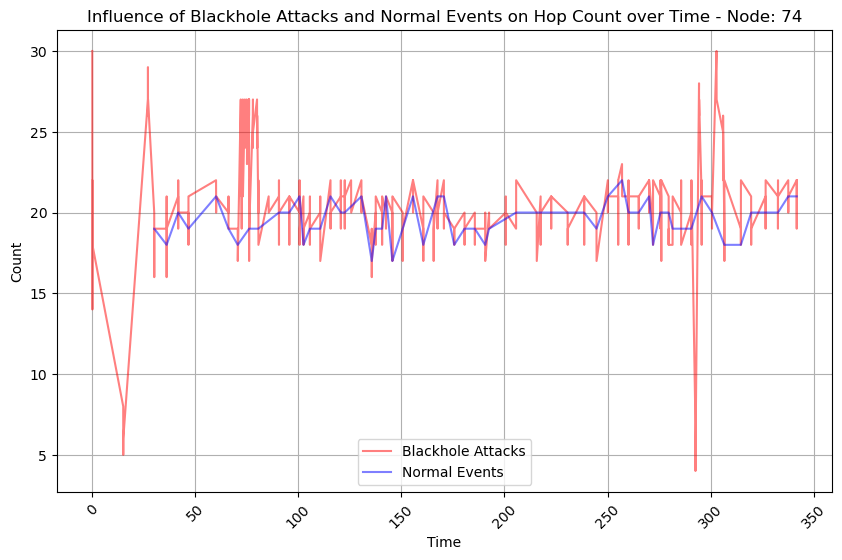

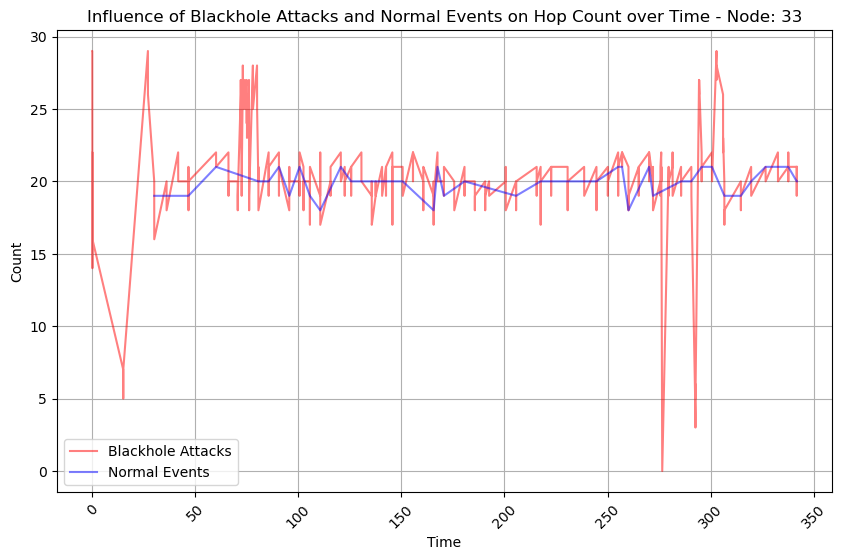

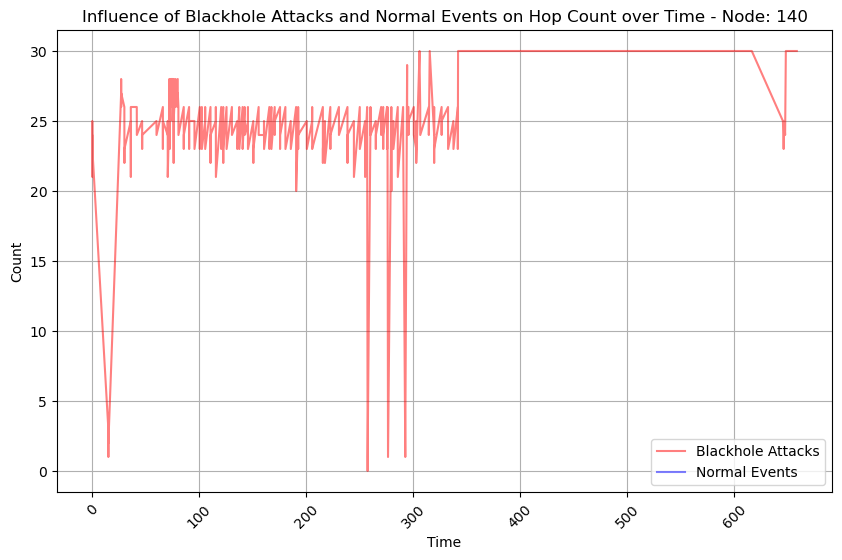

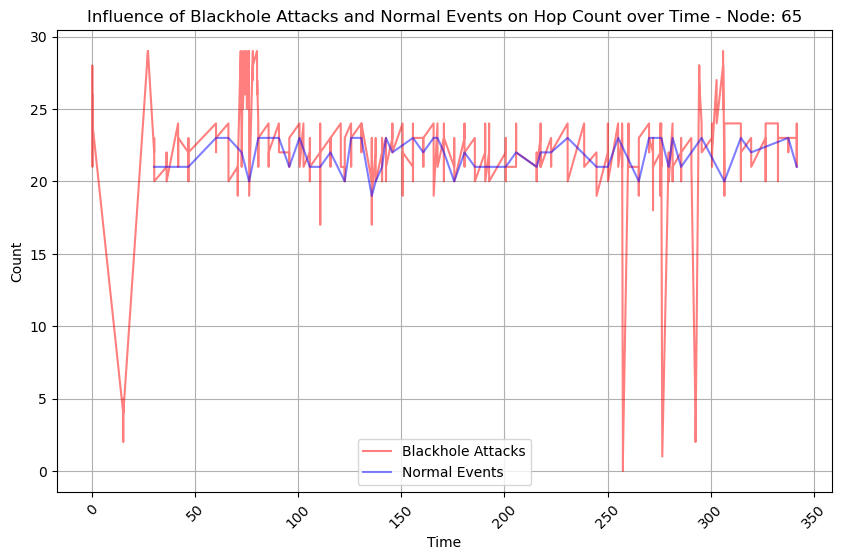

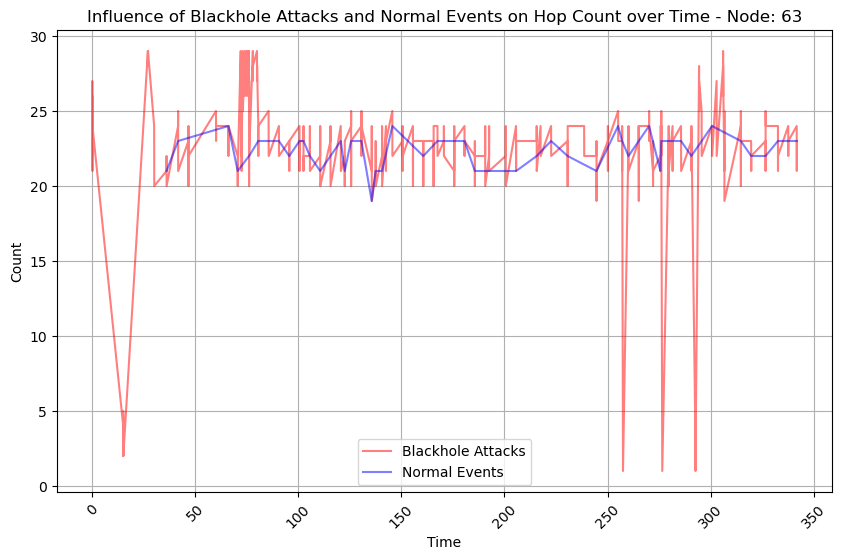

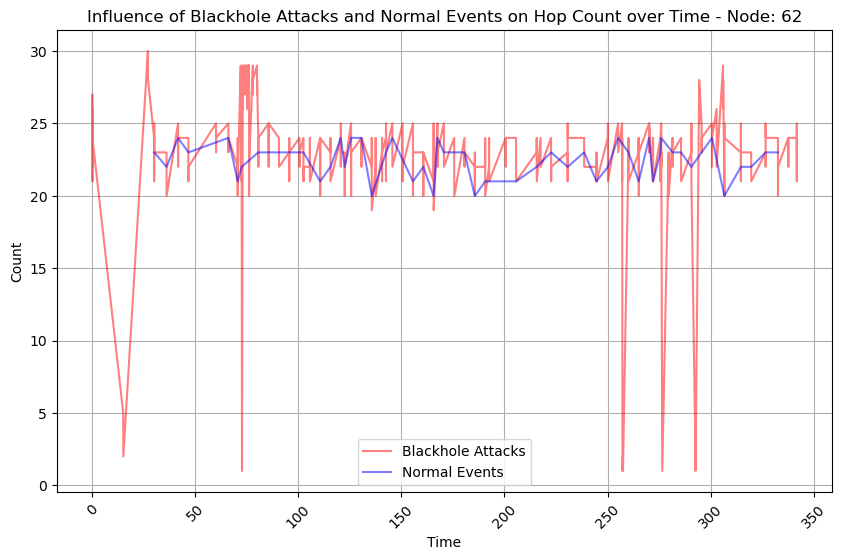

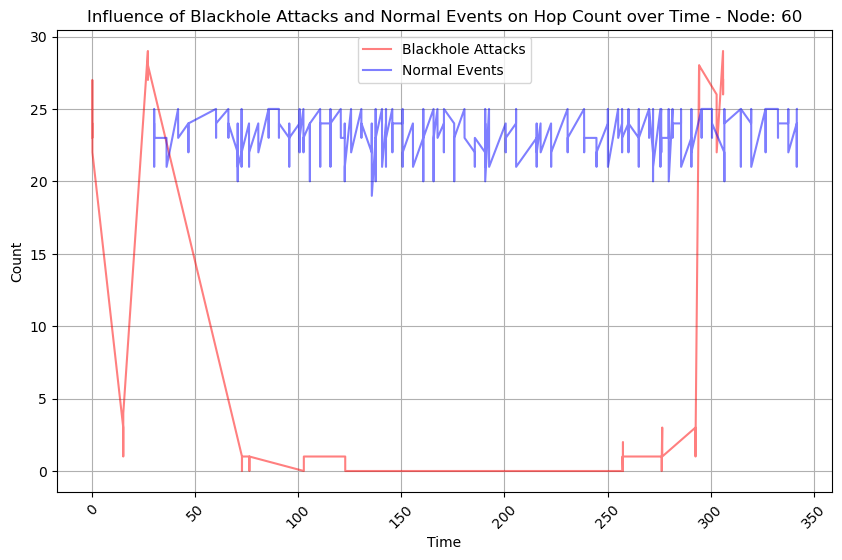

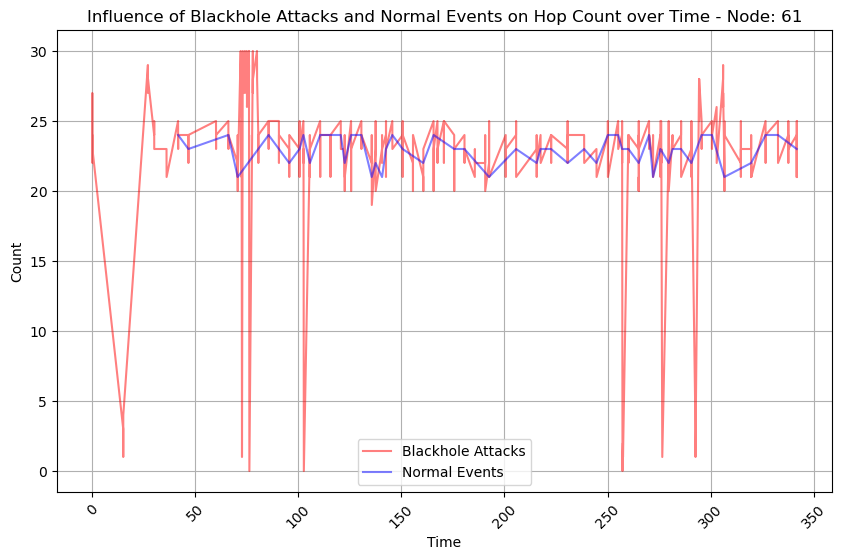

In [39]:
for i in blackhole["Node_id"].unique():
    blackhole_node = blackhole[blackhole["Node_id"] == i]
    normal_node = normal[normal["Node_id"] == i]

    plt.figure(figsize=(10, 6))

    plt.plot(blackhole_node['Time'], blackhole_node['TTL'], color='red', alpha=0.5, label='Blackhole Attacks')
    plt.plot(normal_node['Time'], normal_node['TTL'], color='blue', alpha=0.5, label='Normal Events')

    plt.title(f'Influence of Blackhole Attacks and Normal Events on Hop Count over Time - Node: {i}')
    plt.xlabel('Time')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()


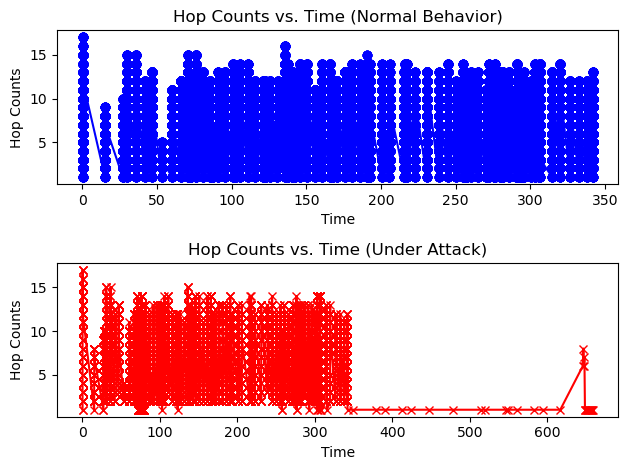

In [40]:
normal_data = df[df['behaviour'] == 'No attack']
normal_time = normal_data['Time']
normal_hop_counts = normal_data['Hop_Count']

attack_data = df[df['behaviour'] == 'Under attack']
attack_time = attack_data['Time']
attack_hop_counts = attack_data['Hop_Count']

plt.subplot(2, 1, 1)  
plt.plot(normal_time, normal_hop_counts, marker='o', color='b')
plt.title('Hop Counts vs. Time (Normal Behavior)')
plt.xlabel('Time')
plt.ylabel('Hop Counts')

plt.subplot(2, 1, 2)  
plt.plot(attack_time, attack_hop_counts, marker='x', color='r')
plt.title('Hop Counts vs. Time (Under Attack)')
plt.xlabel('Time')
plt.ylabel('Hop Counts')

plt.tight_layout()  
plt.show()

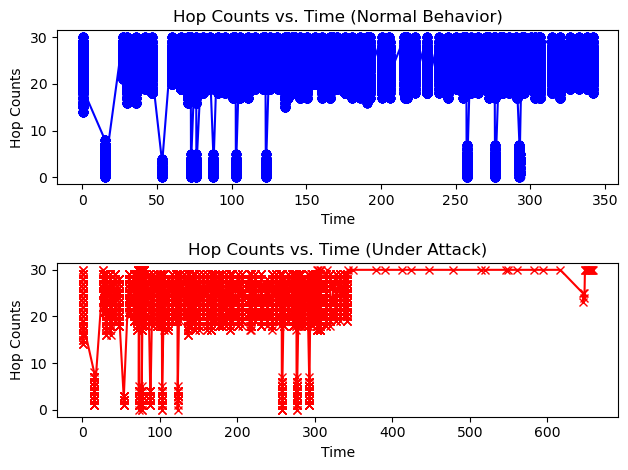

In [41]:
normal_data = df[df['behaviour'] == 'No attack']
normal_time = normal_data['Time']
normal_hop_counts = normal_data['TTL']

attack_data = df[df['behaviour'] == 'Under attack']
attack_time = attack_data['Time']
attack_hop_counts = attack_data['TTL']

plt.subplot(2, 1, 1)  
plt.plot(normal_time, normal_hop_counts, marker='o', color='b')
plt.title('Hop Counts vs. Time (Normal Behavior)')
plt.xlabel('Time')
plt.ylabel('Hop Counts')

plt.subplot(2, 1, 2)  
plt.plot(attack_time, attack_hop_counts, marker='x', color='r')
plt.title('Hop Counts vs. Time (Under Attack)')
plt.xlabel('Time')
plt.ylabel('Hop Counts')

plt.tight_layout()  
plt.show()

In [42]:
df_time = df[(df["Time"] > 300) & (df["Time"] < 340)]

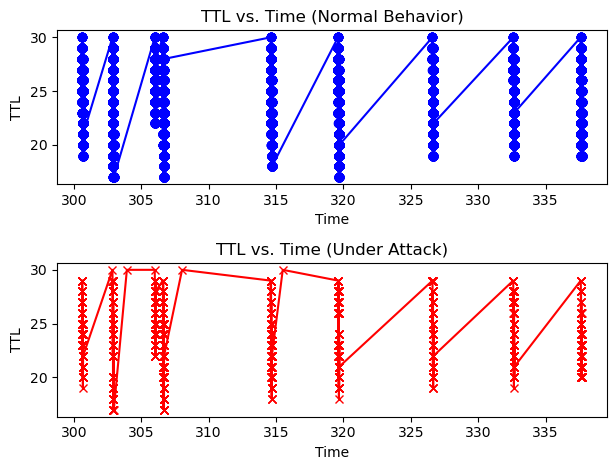

In [43]:
normal_data = df_time[df_time['behaviour'] == 'No attack']
normal_time = normal_data['Time']
normal_hop_counts = normal_data['TTL']

attack_data = df_time[df_time['behaviour'] == 'Under attack']
attack_time = attack_data['Time']
attack_hop_counts = attack_data['TTL']

plt.subplot(2, 1, 1)  
plt.plot(normal_time, normal_hop_counts, marker='o', color='b')
plt.title('TTL vs. Time (Normal Behavior)')
plt.xlabel('Time')
plt.ylabel('TTL')

plt.subplot(2, 1, 2)  
plt.plot(attack_time, attack_hop_counts, marker='x', color='r')
plt.title('TTL vs. Time (Under Attack)')
plt.xlabel('Time')
plt.ylabel('TTL')

plt.tight_layout()  
plt.show()

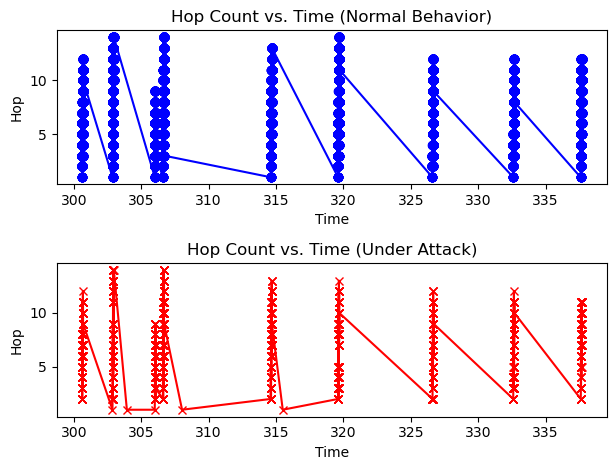

In [44]:
normal_data = df_time[df_time['behaviour'] == 'No attack']
normal_time = normal_data['Time']
normal_hop_counts = normal_data['Hop_Count']

attack_data = df_time[df_time['behaviour'] == 'Under attack']
attack_time = attack_data['Time']
attack_hop_counts = attack_data['Hop_Count']

plt.subplot(2, 1, 1)  
plt.plot(normal_time, normal_hop_counts, marker='o', color='b')
plt.title('Hop Count vs. Time (Normal Behavior)')
plt.xlabel('Time')
plt.ylabel('Hop')

plt.subplot(2, 1, 2)  
plt.plot(attack_time, attack_hop_counts, marker='x', color='r')
plt.title('Hop Count vs. Time (Under Attack)')
plt.xlabel('Time')
plt.ylabel('Hop')

plt.tight_layout()  
plt.show()

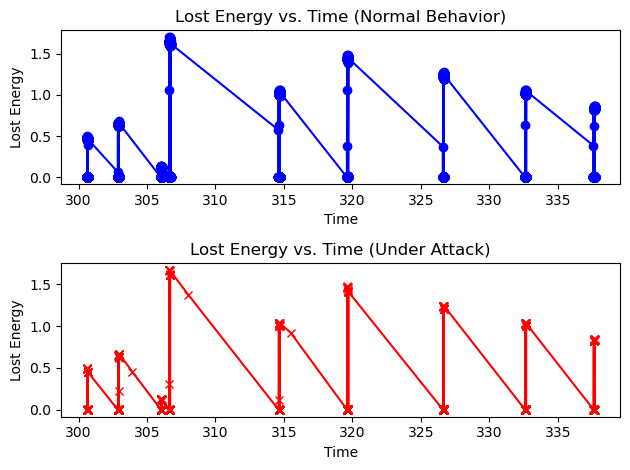

In [45]:
normal_data = df_time[df_time['behaviour'] == 'No attack']
normal_time = normal_data['Time']
normal_hop_counts = normal_data['Lost_Energy']

attack_data = df_time[df_time['behaviour'] == 'Under attack']
attack_time = attack_data['Time']
attack_hop_counts = attack_data['Lost_Energy']

plt.subplot(2, 1, 1)  
plt.plot(normal_time, normal_hop_counts, marker='o', color='b')
plt.title('Lost Energy vs. Time (Normal Behavior)')
plt.xlabel('Time')
plt.ylabel('Lost Energy')

plt.subplot(2, 1, 2)  
plt.plot(attack_time, attack_hop_counts, marker='x', color='r')
plt.title('Lost Energy vs. Time (Under Attack)')
plt.xlabel('Time')
plt.ylabel('Lost Energy')

plt.tight_layout()  
plt.show()

In [46]:
df_time[df_time["TTL"] > 26 ]["behaviour"].value_counts()

No attack       7588
Under attack     619
Name: behaviour, dtype: int64

In [47]:
blackhole = df[df["Type"] == "Blackhole"]
normal = df[df["Type"] == "normal"]

highest_percentage = 0
optimal_hop_count = None
optimal_ttl = None

for hop_count in df["Hop_Count"].unique():
    for ttl in df["TTL"].unique():
        filtered_df = blackhole[(blackhole["Hop_Count"] == hop_count) & (blackhole["TTL"] == ttl)]
        denominator = len(df[(df["Hop_Count"] == hop_count) & (df["TTL"] == ttl)])
        
        if denominator != 0:
            blackhole_percentage = len(filtered_df) / denominator * 100

            if blackhole_percentage > highest_percentage:
                highest_percentage = blackhole_percentage
                optimal_hop_count = hop_count
                optimal_ttl = ttl

print(f"Optimal Hop_Count: {optimal_hop_count}")
print(f"Optimal TTL: {optimal_ttl}")
print(f"Highest Blackhole Percentage: {highest_percentage:.2f}%")

Optimal Hop_Count: 6
Optimal TTL: 3
Highest Blackhole Percentage: 14.78%


In [48]:
at = df[((df["Event"] == 2) | (df["Event"] == 4)) & (df["Hop_Count"] == 6) & (df["TTL"] == 3)]["Type"].value_counts() / sum(df[((df["Event"] == 2) | (df["Event"] == 4)) & (df["Hop_Count"] == 6) & (df["TTL"] == 3) ]["Type"].value_counts())
at * 100

normal       84.976526
Blackhole    15.023474
Name: Type, dtype: float64

In [49]:
at = df[(df["TTL"] > 15)]["Type"].value_counts() / sum(df[ (df["TTL"] > 15)]["Type"].value_counts())
at*100

normal        83.718417
Flooding      10.143361
Blackhole      3.816506
Forwarding     2.321716
Name: Type, dtype: float64

## Flooding

In [50]:
df = pd.read_csv("WSNBFSFdataset.csv")

In [51]:
for i in range(0, 200):
    node_mask = df['Node_id'] == i
    df.loc[node_mask, 'Lost_Energy'] = (df.loc[node_mask, 'Rest_Energy'].shift(1) - df.loc[node_mask, 'Rest_Energy']).shift(-1)
df.dropna(subset=['Lost_Energy'], inplace=True)

In [52]:
flooding = df[df['Type'] == 'Flooding']
flooding["Event"].value_counts()

2    23338
4     4734
1     1772
Name: Event, dtype: int64

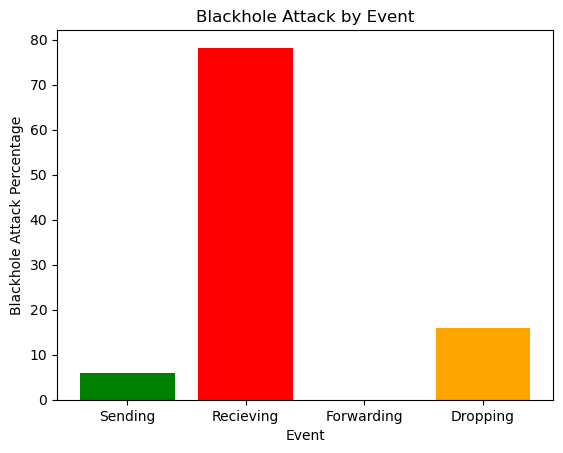

In [53]:
events = ["Sending", "Recieving", "Forwarding", "Dropping"]
blackhole_attack_counts = [1772/flooding.shape[0] * 100,23338/flooding.shape[0] * 100, 0 ,4734/flooding.shape[0] * 100]

colors = ['green', 'red',"blue" ,'orange']

plt.bar(events, blackhole_attack_counts, color=colors)

plt.xlabel('Event')
plt.ylabel('Blackhole Attack Percentage')
plt.title('Blackhole Attack by Event')

plt.show()

In [54]:
flooding = df[df["Type"] == "Flooding"]

In [55]:
flooding["Node_id"].value_counts(sort=True)

57     212
153    208
141    201
152    201
75     200
      ... 
83      12
84      11
61       9
62       7
63       7
Name: Node_id, Length: 198, dtype: int64

In [56]:
df[df["Node_id"] == 57]["Type"].value_counts()

normal      1698
Flooding     212
Name: Type, dtype: int64

C:\Users\kkhou\AppData\Local\Temp\ipykernel_16400\445755521.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  node_57_normal = df[df['Node_id'] == 57][df['Type'] == 'normal']
C:\Users\kkhou\AppData\Local\Temp\ipykernel_16400\445755521.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  node_57_flooding = df[df['Node_id'] == 57][df['Type'] == 'Flooding']


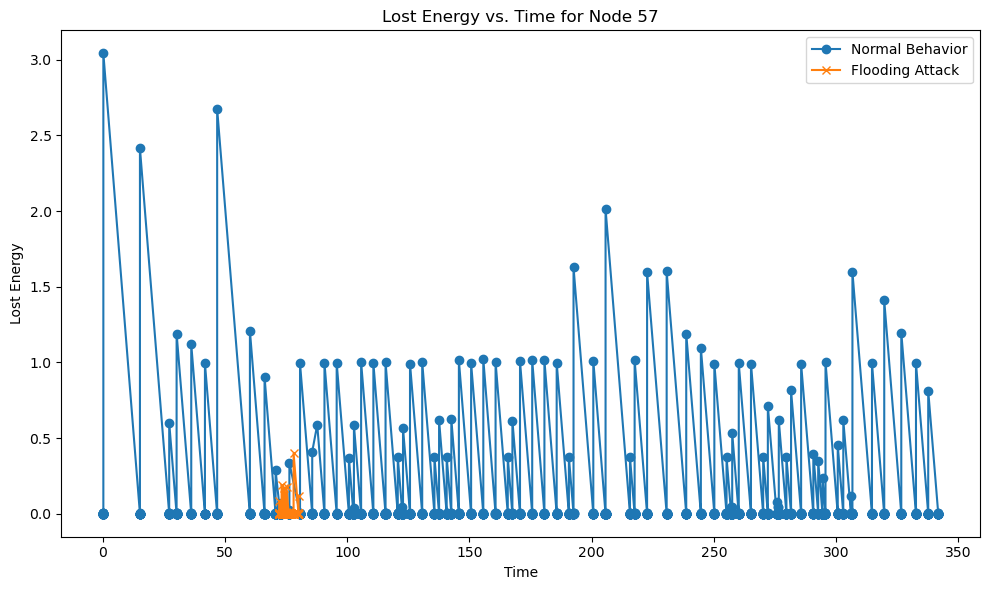

In [57]:
node_57_normal = df[df['Node_id'] == 57][df['Type'] == 'normal']
node_57_flooding = df[df['Node_id'] == 57][df['Type'] == 'Flooding']

# Extract time and lost energy for both behaviors
time_normal = node_57_normal['Time']
lost_energy_normal = node_57_normal['Lost_Energy']

time_flooding = node_57_flooding['Time']
lost_energy_flooding = node_57_flooding['Lost_Energy']

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(time_normal, lost_energy_normal, label='Normal Behavior', marker='o')
plt.plot(time_flooding, lost_energy_flooding, label='Flooding Attack', marker='x')

plt.title('Lost Energy vs. Time for Node 57')
plt.xlabel('Time')
plt.ylabel('Lost Energy')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\kkhou\AppData\Local\Temp\ipykernel_16400\1610046936.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  node_153_normal = df[df['Node_id'] == 153][df['Type'] == 'normal']
C:\Users\kkhou\AppData\Local\Temp\ipykernel_16400\1610046936.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  node_153_flooding = df[df['Node_id'] == 153][df['Type'] == 'Flooding']


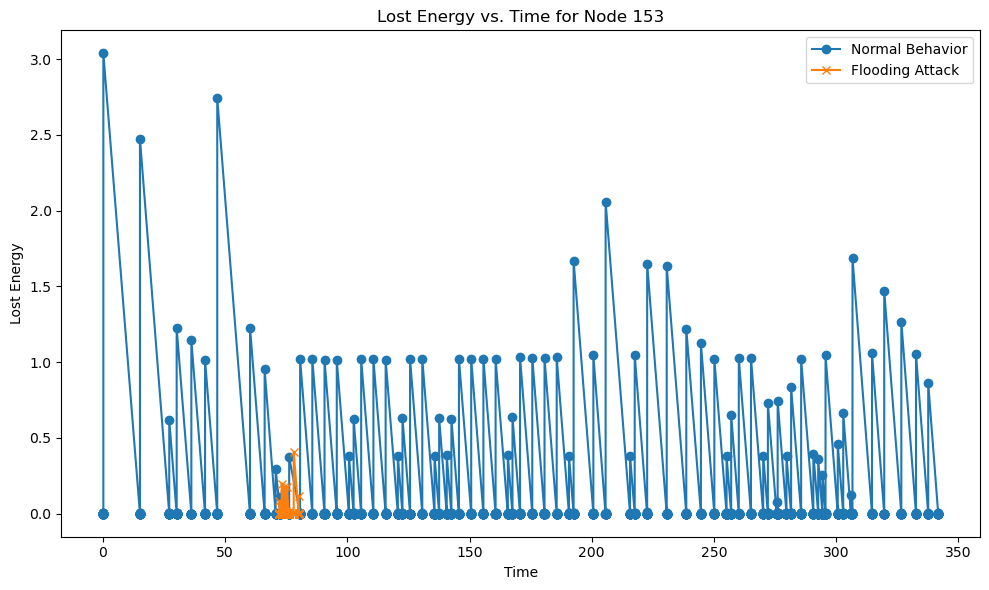

In [58]:
node_153_normal = df[df['Node_id'] == 153][df['Type'] == 'normal']
node_153_flooding = df[df['Node_id'] == 153][df['Type'] == 'Flooding']

# Extract time and lost energy for both behaviors
time_normal = node_153_normal['Time']
lost_energy_normal = node_153_normal['Lost_Energy']

time_flooding = node_153_flooding['Time']
lost_energy_flooding = node_153_flooding['Lost_Energy']

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(time_normal, lost_energy_normal, label='Normal Behavior', marker='o')
plt.plot(time_flooding, lost_energy_flooding, label='Flooding Attack', marker='x')

plt.title('Lost Energy vs. Time for Node 153')
plt.xlabel('Time')
plt.ylabel('Lost Energy')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\kkhou\AppData\Local\Temp\ipykernel_16400\994101063.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  node_75_normal = df[df['Node_id'] == 75][df['Type'] == 'normal']
C:\Users\kkhou\AppData\Local\Temp\ipykernel_16400\994101063.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  node_75_flooding = df[df['Node_id'] == 75][df['Type'] == 'Flooding']


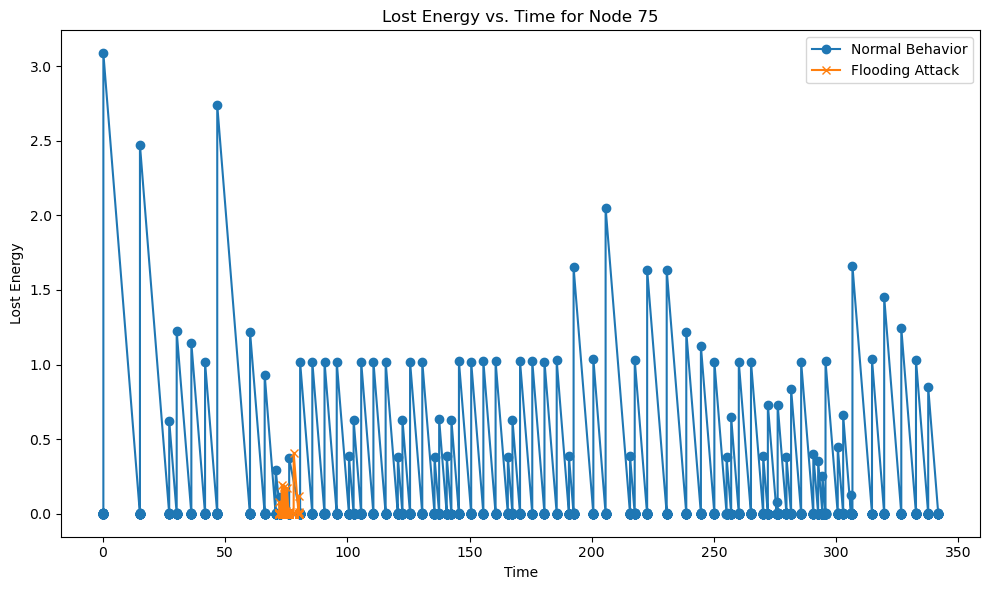

In [59]:
node_75_normal = df[df['Node_id'] == 75][df['Type'] == 'normal']
node_75_flooding = df[df['Node_id'] == 75][df['Type'] == 'Flooding']

# Extract time and lost energy for both behaviors
time_normal = node_75_normal['Time']
lost_energy_normal = node_75_normal['Lost_Energy']

time_flooding = node_75_flooding['Time']
lost_energy_flooding = node_75_flooding['Lost_Energy']

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(time_normal, lost_energy_normal, label='Normal Behavior', marker='o')
plt.plot(time_flooding, lost_energy_flooding, label='Flooding Attack', marker='x')

plt.title('Lost Energy vs. Time for Node 75')
plt.xlabel('Time')
plt.ylabel('Lost Energy')
plt.legend()
plt.tight_layout()
plt.show()

#### Flooding is happeing between 60 and 100

In [60]:
df[(df["Time"] > 65) & (df["Time"] < 100)]["Type"].value_counts()

normal        29920
Flooding      29844
Blackhole      2305
Forwarding     1642
Name: Type, dtype: int64

In [61]:
flooding_time = df[(df["Time"] > 65) & (df["Time"] < 100)]

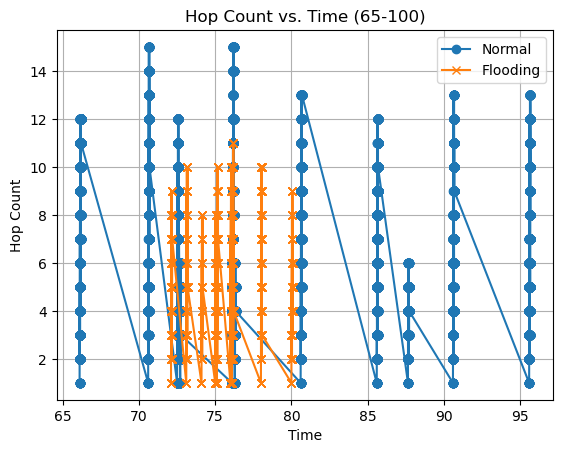

In [62]:
normal_data = flooding_time[flooding_time['Type'] == 'normal']
flooding_data = flooding_time[flooding_time['Type'] == 'Flooding']

plt.plot(normal_data['Time'], normal_data['Hop_Count'], marker='o', linestyle='-', label='Normal')
plt.plot(flooding_data['Time'], flooding_data['Hop_Count'], marker='x', linestyle='-', label='Flooding')
plt.title("Hop Count vs. Time (65-100)")
plt.xlabel('Time')
plt.ylabel('Hop Count')
plt.legend()
plt.grid()
plt.show()

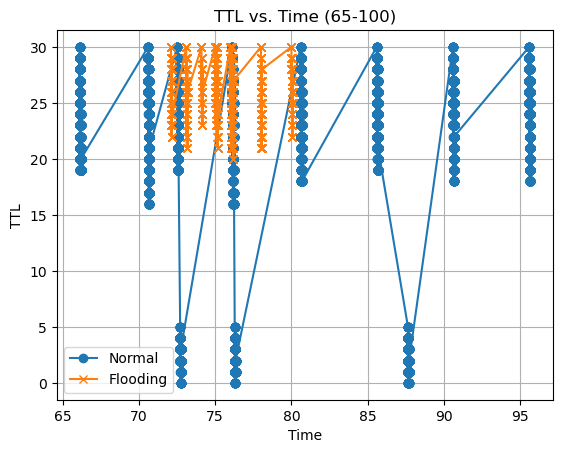

In [63]:
normal_data = flooding_time[flooding_time['Type'] == 'normal']
flooding_data = flooding_time[flooding_time['Type'] == 'Flooding']

plt.plot(normal_data['Time'], normal_data['TTL'], marker='o', linestyle='-', label='Normal')
plt.plot(flooding_data['Time'], flooding_data['TTL'], marker='x', linestyle='-', label='Flooding')
plt.title("TTL vs. Time (65-100)")
plt.xlabel('Time')
plt.ylabel('TTL')
plt.legend()
plt.grid()
plt.show()

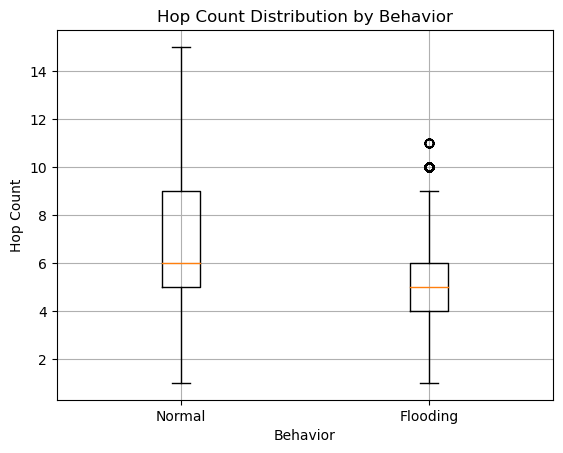

In [64]:
plt.boxplot([flooding_time[flooding_time['Type'] == 'normal']['Hop_Count'],
             flooding_time[flooding_time['Type'] == 'Flooding']['Hop_Count']],
            labels=['Normal', 'Flooding'])
plt.title('Hop Count Distribution by Behavior')
plt.xlabel('Behavior')
plt.ylabel('Hop Count')
plt.grid()
plt.show()

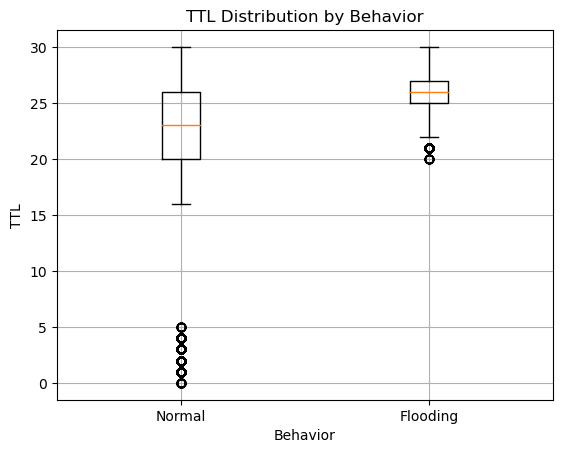

In [65]:
plt.boxplot([flooding_time[flooding_time['Type'] == 'normal']['TTL'],
             flooding_time[flooding_time['Type'] == 'Flooding']['TTL']],
            labels=['Normal', 'Flooding'])
plt.title('TTL Distribution by Behavior')
plt.xlabel('Behavior')
plt.ylabel('TTL')
plt.grid()
plt.show()

In [86]:
contingency_(df["Type"],df["Hop_Count"])

Hop_Count,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,All
Type,,,,,,,,,,,,,,,,,,
Blackhole,49,373,451,459,659,1070,1863,1948,1483,1350,1076,603,277,76,23,3,3,11766
Flooding,152,2410,4042,5532,6741,4970,3167,1854,556,398,22,0,0,0,0,0,0,29844
Forwarding,11,930,2103,2252,1243,508,215,62,70,70,58,64,50,9,0,0,0,7645
normal,883,11112,19974,28604,34601,31258,27511,27196,24735,22316,17126,10604,4799,1728,343,41,20,262851
All,1095,14825,26570,36847,43244,37806,32756,31060,26844,24134,18282,11271,5126,1813,366,44,23,312106


In [87]:
contingency_(df["Type"],df["TTL"])

TTL,0,1,2,3,4,5,6,7,8,14,...,22,23,24,25,26,27,28,29,30,All
Type,,,,,,,,,,,,,,,,,,,,,
Blackhole,13,174,155,70,38,32,27,14,1,3,...,1483,1932,1689,910,572,433,416,349,47,11766
Flooding,0,0,0,0,0,0,0,0,0,0,...,556,1854,3167,4970,6741,5532,4042,2410,152,29844
Forwarding,0,60,203,261,157,81,45,2,0,0,...,70,62,215,508,1198,2033,1751,745,3,7645
normal,185,4990,3696,2883,2159,1318,805,235,13,20,...,24721,26771,25948,29958,30336,24526,17031,9533,766,262851
All,198,5224,4054,3214,2354,1431,877,251,14,23,...,26830,30619,31019,36346,38847,32524,23240,13037,968,312106


In [66]:
insight = df[(df["Hop_Count"] < 7) & (df["Hop_Count"] > 3) & (df["TTL"] > 24) & (df["TTL"] < 28)&(df['Time'] > 65) & (df['Time'] < 100)]["Type"].value_counts() / sum(df[ (df["Hop_Count"] < 7) & (df["Hop_Count"] > 3) & (df["TTL"] > 24) & (df["TTL"] < 28)&(df['Time'] > 65) & (df['Time'] < 100)]["Type"].value_counts())
insight * 100

Flooding      62.145895
normal        32.008217
Forwarding     3.243711
Blackhole      2.602177
Name: Type, dtype: float64

#### When is the hop count is between (7 - 3), and the TTL is between (24 - 28), and the time is between (65 - 100). 62% of the type is Flooding Attack.

In [67]:
subset = df[(df['Time'] > 65) & (df['Time'] < 100)]

In [68]:
subset

,Event,Time,S_Node,Node_id,Rest_Energy,Trace_Level,Mac_Type_Pckt,Source_IP_Port,Des_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num,behaviour,Type,Lost_Energy
31810,1,66.100195,160,160,586.292486,5,800,160.255,1.255,106,30,1,7,199,0,160,16,No attack,normal,0.008055
31811,2,66.101043,162,162,586.302058,5,800,160.255,1.255,48,30,1,7,199,0,160,16,No attack,normal,0.000392
31812,2,66.101044,164,164,586.287555,5,800,160.255,1.255,48,30,1,7,199,0,160,16,No attack,normal,0.000392
31813,2,66.101044,121,121,585.905900,5,800,160.255,1.255,48,30,1,7,199,0,160,16,No attack,normal,0.000700
31814,2,66.101044,165,165,586.277177,5,800,160.255,1.255,48,30,1,7,199,0,160,16,No attack,normal,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95516,2,95.690036,107,107,580.212391,5,800,69.255,1.255,48,21,10,15,135,0,160,34,No attack,normal,1.004263
95517,2,95.690036,31,31,580.160436,5,800,69.255,1.255,48,21,10,15,135,0,160,34,No attack,normal,1.012038
95518,2,95.690037,106,106,580.205186,5,800,69.255,1.255,48,21,10,15,135,0,160,34,No attack,normal,1.004380
95519,2,95.690037,64,64,580.393157,5,800,69.255,1.255,48,21,10,15,135,0,160,34,No attack,normal,0.996311


In [72]:
df = pd.read_csv("WSNBFSFdataset.csv")
label_encoder = LabelEncoder()
df['Type_encoded'] = label_encoder.fit_transform(df['Type'])
df['behaviour_encoded'] = label_encoder.fit_transform(df['behaviour'])

df_encoded = df.copy()
columns_to_drop = ['Type', 'behaviour'] 
df_encoded.drop(columns = ['Type', 'behaviour'] , inplace = True)

In [73]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df_encoded.drop(['behaviour_encoded', 'Time', 'Type_encoded'], axis=1)
y = df_encoded['behaviour_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

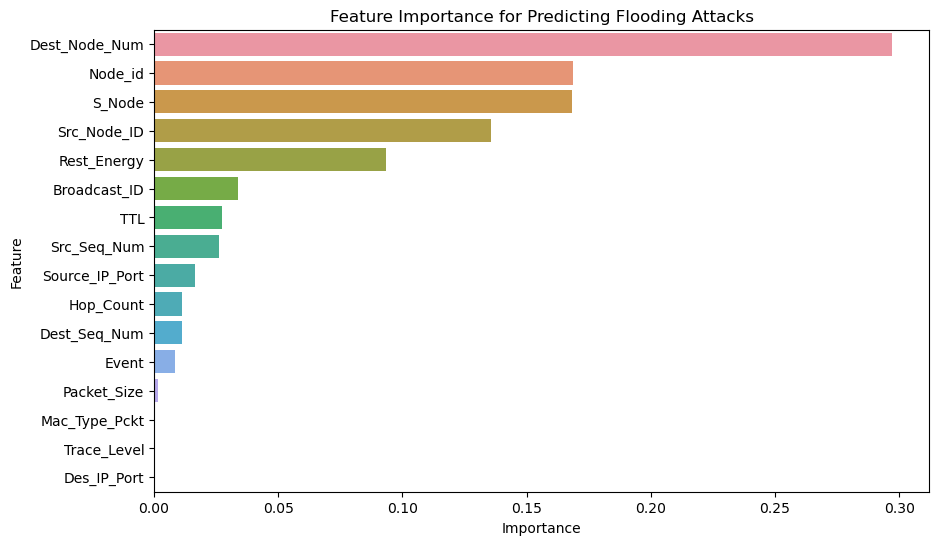

           Feature  Importance
12   Dest_Node_Num    0.297097
2          Node_id    0.168797
1           S_Node    0.168076
14     Src_Node_ID    0.135755
3      Rest_Energy    0.093547
11    Broadcast_ID    0.033730
9              TTL    0.027448
15     Src_Seq_Num    0.026266
6   Source_IP_Port    0.016672
10       Hop_Count    0.011106
13    Dest_Seq_Num    0.011092
0            Event    0.008596
8      Packet_Size    0.001782
5    Mac_Type_Pckt    0.000037
4      Trace_Level    0.000000
7      Des_IP_Port    0.000000


In [75]:
importance_scores = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to store feature importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_scores})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Predicting Flooding Attacks')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Display the top features
print(feature_importance_df)


In [76]:
def contingency_ (col1, col2):

    contingency_table = pd.crosstab(

    index=col1,

    columns=col2,

    margins=True)

    return contingency_table

In [77]:
contingency_(df["Type"],df["Dest_Node_Num"])

Dest_Node_Num,36,37,38,39,40,100,121,130,131,132,...,188,189,191,192,193,194,195,196,199,All
Type,,,,,,,,,,,,,,,,,,,,,
Blackhole,118,267,384,127,287,1099,355,286,135,134,...,141,148,138,261,148,136,370,121,134,11766
Flooding,3374,6587,9945,3298,6640,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29844
Forwarding,85,157,233,87,153,449,767,184,77,93,...,82,85,95,187,79,83,246,73,87,7645
normal,0,0,0,0,0,20332,13408,6828,3266,3331,...,3316,3330,3426,6824,3322,3306,9971,3376,3316,262851
All,3577,7011,10562,3512,7080,21880,14530,7298,3478,3558,...,3539,3563,3659,7272,3549,3525,10587,3570,3537,312106


In [79]:
df[(df["Dest_Node_Num"] > 35) & (df["Dest_Node_Num"] < 41)]["Type"].value_counts()

Flooding      29844
Blackhole      1183
Forwarding      715
Name: Type, dtype: int64

In [84]:
insight = 29844/31742

In [85]:
insight

0.940205406086573